# Analysing the host information including;age, location,gender and status for the possible prediction of outcome of recovery vs Death

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('data_SARS-CoV-2_TestMetadata_with_viral.csv')

In [3]:
# iterating the columns 
for col in data.columns: 
    print(col) 

record_date
virus_name
accession_id
type
lineage
passage_details_history
collection_date
location
host
additional_location_info
gender
age
status
specimen_source
additional_host_information
outbreak
last_vaccinated
treatment
sequencing_technology
assembly_method
coverage
comment
originating_lab
originating_lab_address
sample_id_given_by_sample_provider
submitting_lab
submitting_lab_address
sample_id_given_by_submitting_lab
authors
submitter
submission_date
submitter_address
Query
Strand
%N
Length(nt)
Length(aa)
#Muts
%Muts
#UniqueMuts
%UniqueMuts
#ExistingMuts
%ExistingMuts
Comment
Symbol
Reference
UniqueMutList
ExistingMutList
Clade
IfExistSpecialChar


# Preprocessing and cleaning the data

In [4]:
#important features
#important features
start_data_row = 0
Final_data_row = 255
Data = data.loc[ start_data_row:Final_data_row , ['location','gender','age','status']]
#change the index of the data according to the length of the new data
Data.index = range(len(Data))

In [5]:
#getting rid of NaN data
Data.dropna(subset = ['status'], inplace=True)

In [6]:
#getting rid of NaN data
Data.drop(Data.loc[Data['status']=='unknown'].index, inplace=True)
Data.index = range(len(Data))

In [7]:
#organizing the location based on the continent and country (For USA: continent,country, and state )
Location = Data.location.str.split('/')
listToStr_location = list()
for i in range(len(Location)):  
    if Location[i][1:2][0]!=' USA ':
        Location[i] = Location[i][0:2]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
    else:
        Location[i] = Location[i][0:3]
        listToStr_location. append(' '.join([str(elem) for elem in Location[i]]))
listToStr_location

['Oceania   Australia ',
 'Oceania   Australia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Asia   Georgia ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Europe   France ',
 'Asia   China ',
 'Europe   Russia ',
 'Asia   China ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Brazil ',
 'South America   Ecuador ',
 'Central America   Costa Rica',
 'Central America   Costa Rica',
 'Central America   Costa Rica',
 'Oceania   New Zealand ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   India ',
 'Asia   Thailand ',
 'Asia   Thailand ',
 'Nort

In [8]:
Data.location =listToStr_location
Data.groupby('location')
Data

,location,gender,age,status
0,Oceania Australia,male,53,Recovered
1,Oceania Australia,Female,21,Recovered
2,Asia Georgia,Female,"31, 6 month",Hospitalized
3,Asia Georgia,Male,"59, 1 months",Hospitalized
4,Asia Georgia,Male,33.5,Hospitalized
...,...,...,...,...
199,North America USA Puerto Rico,unknown,unknown,Asymptomatic
200,Africa Nigeria,Female,30,Not Hospitalized
201,Oceania Guam,Male,62,Outpatient
202,Asia India,Female,63,Mild


In [9]:
#replacing the age that were in months to year
Data['age'] = Data['age'].str.replace('months','')
Data['age'] = Data['age'].str.replace('month','')

for i in range(1,len(Data)):
    index_1 = Data.age[i].find(',') 
    index_2 = Data.age[i].find('-') 
    index_3 = Data.age[i].find('unknown') 
    if index_1!=-1:
        Data.age[i] = Data.age[i][:index_1]
        Data.age[i] = int(float(Data.age[i])/12)
    if index_2!=-1:
        Data.age[i] = int((float(Data.age[i][index_2+1:])+float(Data.age[i][:index_2]))/2)
    if index_3!=-1:
        Data.age[i] = 'NaN'


In [10]:
#deleting the >, 's and s from age
Data['age'] = Data['age'].str.replace('>','')
Data['age'] = Data['age'].str.replace('s','')
Data['age'] = Data['age'].str.replace("'",'')

In [11]:
#the unknown gender is set to missing category
for i in range(1,len(Data)):
    index_4 = Data.gender[i].find('unknown') 
    if index_4!=-1:
        Data.gender[i] = 4


In [12]:
#labeling the data
Data.replace(['female','Female'],value= [1,1], inplace=True)
Data.replace(['male','Male'],value= [0,0], inplace=True)
    

In [13]:
#Labeling
Data.status[Data['status'] != 'Deceased']='Recovered'

C:\Users\Azadeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Imputing the unknown data using KNN

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(Data[['age']])
Data['age']=imputer.transform(Data[['age']])
Data['age']=imputer.transform(Data[['age']])

In [15]:
#Finding unknown data
Data.loc[Data['gender']=='unknown']

C:\Users\Azadeh\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,location,gender,age,status


In [16]:
#using dummies instead of location data for ML input
Data_model = pd.concat([pd.get_dummies(Data[['location']]), Data[['gender','age','status']]], axis=1)
Data_model.head()

,location_Africa Egypt,location_Africa Nigeria,location_Asia Bangladesh,location_Asia China,location_Asia Georgia,location_Asia Hong Kong,location_Asia India,location_Asia Iran,location_Asia Israel,location_Asia Japan,...,location_Oceania Australia,location_Oceania Guam,location_Oceania New Zealand,location_South America Brazil,location_South America Colombia,location_South America Ecuador,location_South America Uruguay,gender,age,status
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,53.000000,Recovered
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,21.000000,Recovered
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,51.422872,Recovered
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,51.422872,Recovered
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33.500000,Recovered


In [17]:
#checking the balance in the data
Data_model['status'].value_counts()

Recovered    172
Deceased      32
Name: status, dtype: int64

In [18]:
Data_model.columns

Index(['location_Africa   Egypt', 'location_Africa   Nigeria ',
       'location_Asia   Bangladesh ', 'location_Asia   China ',
       'location_Asia   Georgia ', 'location_Asia   Hong Kong',
       'location_Asia   India ', 'location_Asia   Iran ',
       'location_Asia   Israel', 'location_Asia   Japan ',
       'location_Asia   Kuwait ', 'location_Asia   Lebanon ',
       'location_Asia   Malaysia ', 'location_Asia   Taiwan ',
       'location_Asia   Thailand ', 'location_Central America   Costa Rica',
       'location_Europe   Austria', 'location_Europe   Austria ',
       'location_Europe   Belgium ', 'location_Europe   Croatia ',
       'location_Europe   Denmark ', 'location_Europe   France ',
       'location_Europe   Germany ', 'location_Europe   Italy ',
       'location_Europe   Russia ', 'location_Europe   Spain ',
       'location_Europe   Turkey ', 'location_North America   Mexico ',
       'location_North America   USA   Montana',
       'location_North America   USA   P

# Data visualization

In [19]:
subset_attributes = ['location_Africa   Egypt', 'location_Africa   Nigeria ',
       'location_Asia   Bangladesh ', 'location_Asia   China ',
       'location_Asia   Georgia ', 'location_Asia   Hong Kong',
       'location_Asia   India ', 'location_Asia   Iran ',
       'location_Asia   Israel', 'location_Asia   Japan ',
       'location_Asia   Kuwait ', 'location_Asia   Lebanon ',
       'location_Asia   Malaysia ', 'location_Asia   Taiwan ',
       'location_Asia   Thailand ', 'location_Central America   Costa Rica',
       'location_Europe   Austria', 'location_Europe   Austria ',
       'location_Europe   Belgium ', 'location_Europe   Croatia ',
       'location_Europe   Denmark ', 'location_Europe   France ',
       'location_Europe   Germany ', 'location_Europe   Italy ',
       'location_Europe   Russia ', 'location_Europe   Spain ',
       'location_Europe   Turkey ', 'location_North America   Mexico ',
       'location_North America   USA   Montana',
       'location_North America   USA   Puerto Rico',
       'location_North America   USA   Texas ',
       'location_Oceania   Australia ', 'location_Oceania   Guam',
       'location_Oceania   New Zealand ', 'location_South America   Brazil ',
       'location_South America   Colombia ',
       'location_South America   Ecuador ',
       'location_South America   Uruguay ', 'gender_Female', 'gender_Male',
       'gender_missing', 'age', 'status']
round(Data_model[subset_attributes].describe(),2)



KeyError: "['gender_Female', 'gender_missing', 'gender_Male'] not in index"

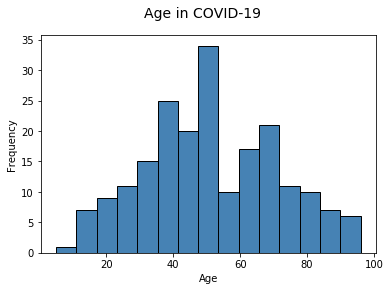

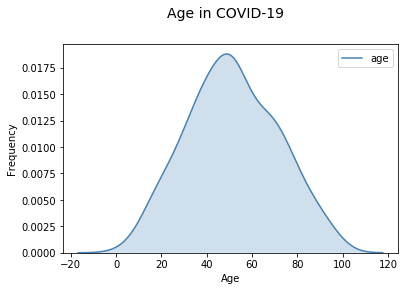

In [20]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Age in COVID-19", fontsize=14)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 

freq, bins, patches = ax.hist(Data_model['age'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Age in COVID-19", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency") 
sns.kdeplot(Data_model['age'], ax=ax1, shade=True, color='steelblue') 

C:\Users\Azadeh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


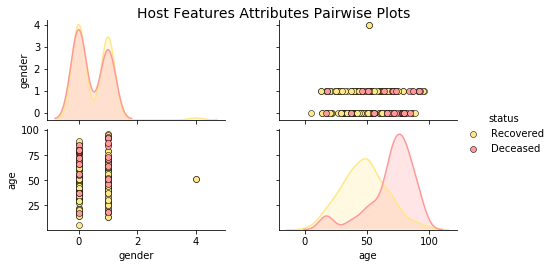

In [22]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['gender', 'age', 'status']
pp = sns.pairplot(Data_model[cols], hue='status', size=1.8, aspect=1.8, 
                  palette={"Deceased": "#FF9999", "Recovered": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Host Features Attributes Pairwise Plots', fontsize=14)